# リンク座標系

In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

## 座標系の準備

- 原点: org
- 座標系1 : sigma1
- 座標系2 : sigma2
- 原点から座標系1への変換: T0_1 (原点座標系で表される)
- 座標系1から座標系2への変換: T1_2 (1座標系で表される)
- 座標系2からエンドエフェクタへの変換: T2_ee (2座標系で表される)

In [2]:
org=coordinates()
T0_1=coordinates(npa([0, 0.5, 0.5]))
T1_2=coordinates(npa([0, 0.5, 0]))
T1_2.rotate(PI/4, coordinates.X)
T2_ee=coordinates(npa([0, 0.2, 0.2]))

<coordinates[0x55d775f39200] 0 0.5 0 / 0.382683 0 0 0.92388 >

### 座標系1
transformメソッドはオブジェクトを変更してしまうので、copy()メソッドを使って元の値のコピーを変更している。

In [3]:
sigma1=org.copy().transform(T0_1)

In [4]:
sigma1

<coordinates[0x55d775eec570] 0 0.5 0.5 / 0 0 0 1 >

### 座標系2

In [5]:
sigma2=sigma1.copy().transform(T1_2)

In [6]:
sigma2

<coordinates[0x55d773754f40] 0 1 0.5 / 0.382683 0 0 0.92388 >

### エンドエフェクタ

In [7]:
sigmaEE=sigma2.copy().transform(T2_ee)

In [8]:
sigmaEE

<coordinates[0x55d775d58300] 0 1 0.782843 / 0.382683 0 0 0.92388 >

## 座標系の表示

In [9]:
dc = DrawCoords(length=0.4, width=5)

In [10]:
dc.addCoords(coordinates())

1

In [11]:
dc.addCoords(sigma1)

2

In [12]:
dc.addCoords(sigma2)

3

In [13]:
dc.addCoords(sigmaEE)

4

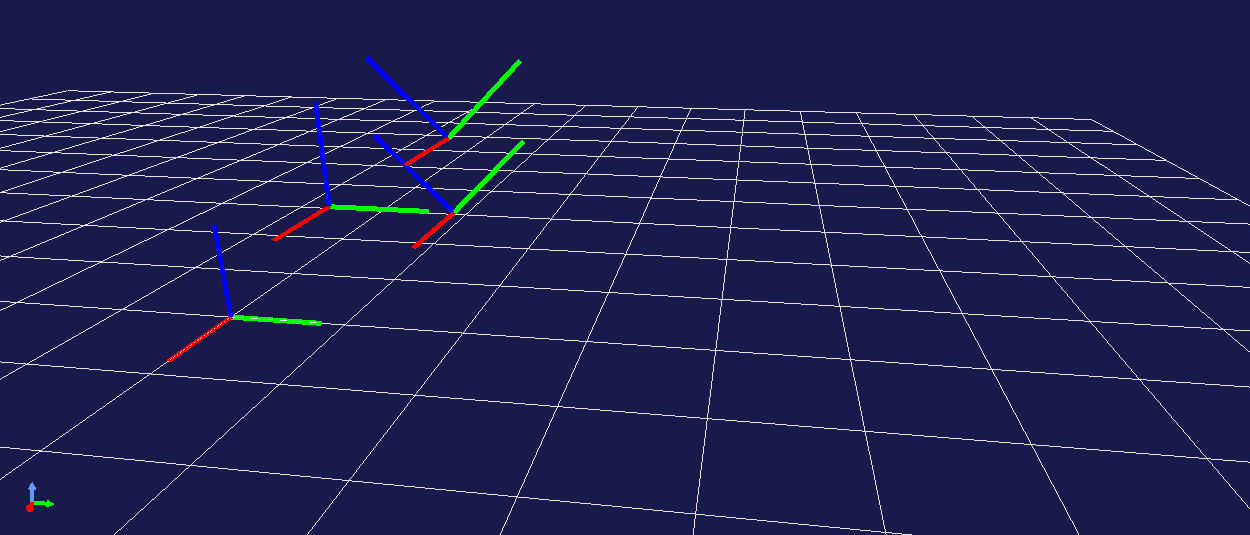

In [14]:
%display

## 練習問題
sigma1を動かして、sigmaEEがorgと一致するようにしてみよう

(ここでは、原点からの座標系1の変換 T0_1 のみを変更する)

In [15]:
T1_ee=sigma1.transformation(sigmaEE)

In [16]:
T1_ee

<coordinates[0x55d774051230] 0 0.5 0.282843 / 0.382683 0 0 0.92388 >

解答の計算

In [17]:
T0_1=T1_ee.inverse_transformation()

解答を使った座標系の計算

In [18]:
sigma1=org.copy().transform(T0_1)

In [19]:
sigma2=sigma1.copy().transform(T1_2)

In [20]:
sigmaEE=sigma2.copy().transform(T2_ee)

エンドエフェクタ位置の確認

In [24]:
sigmaEE

<coordinates[0x55d7760797c0] 0 0 5.55112e-17 / 0 0 0 1 >

解答の表示

In [25]:
dc.clear()

In [26]:
dc.addCoords(sigmaEE)

1

In [27]:
dc.addCoords(sigma2)

2

In [28]:
dc.addCoords(sigma1)

3

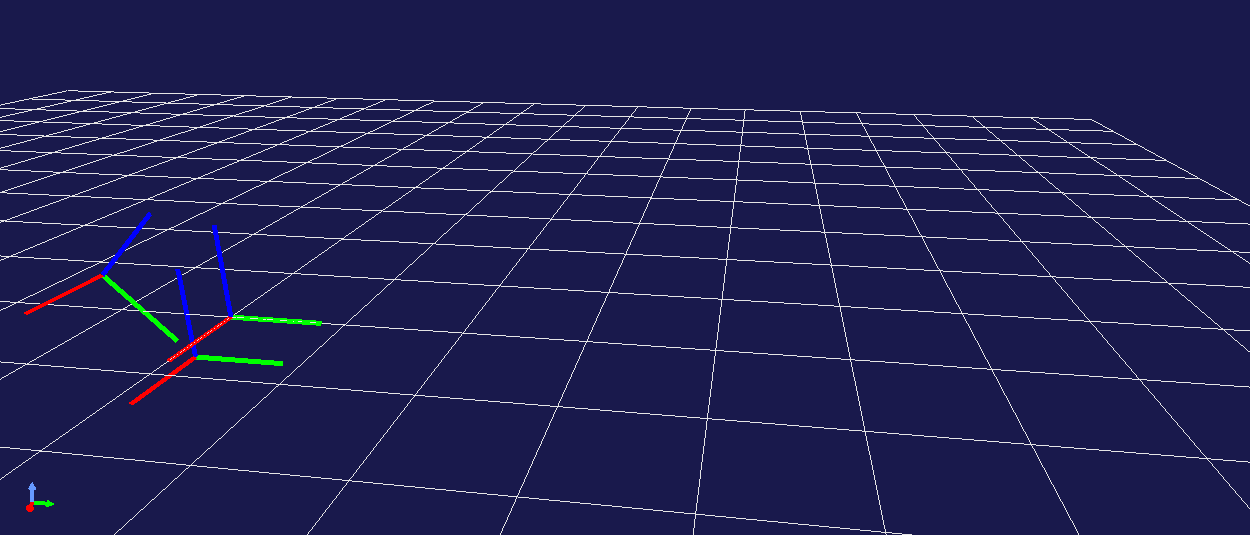

In [29]:
%display

### 練習問題の別解

DrawCoordsの原点を移動させて同様な表示となるか確認する。

In [30]:
dc1 = DrawCoords(length=0.3, width=8)

In [31]:
sigma1=coordinates()
dc1.addCoords(sigma1)

1

In [32]:
sigma2=sigma1.copy().transform(T1_2)
dc1.addCoords(sigma2)

2

In [33]:
sigmaEE=sigma2.copy().transform(T2_ee)
dc1.addCoords(sigmaEE)

3

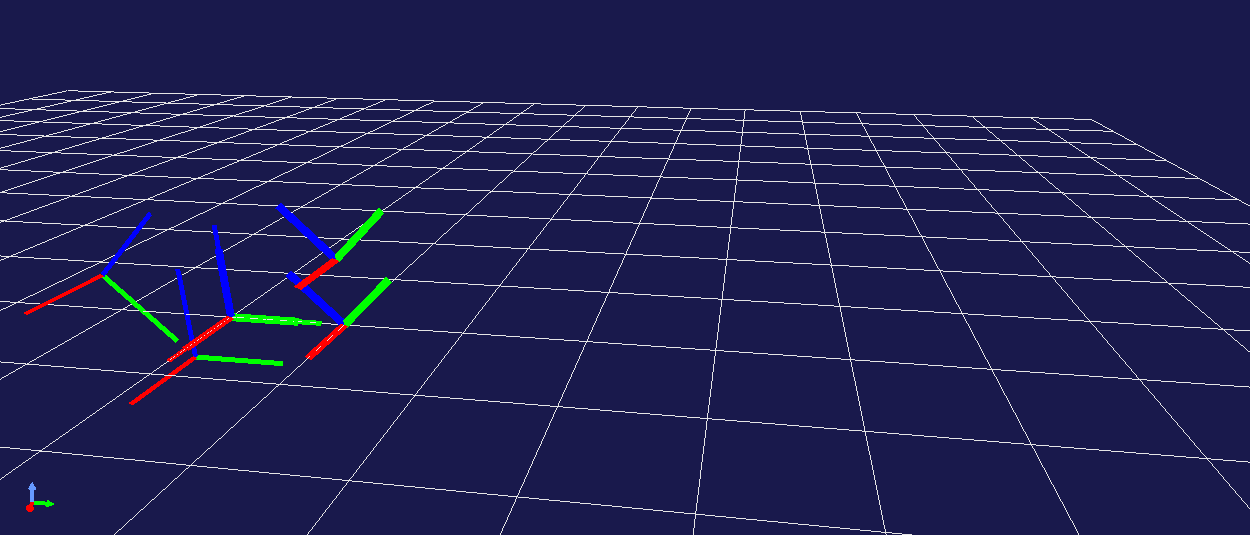

In [34]:
%display

座標系を動かしてみる

In [35]:
dc1.translate(npa([0,0,0.5]))

Wrap <class 'irsl_choreonoid.draw_coords.DrawCoordsListWrapped'> : <coordinates[0x55d775eec570] 0 0 0.5 / 0 0 0 1 >

In [36]:
dc1.rotate(-PI/6, coordinates.X)

Wrap <class 'irsl_choreonoid.draw_coords.DrawCoordsListWrapped'> : <coordinates[0x55d775eec570] 0 0 0.5 / -0.258819 0 0 0.965926 >

この時のエンドエフェクタの位置

In [37]:
dc1.copy().transform(T1_ee)

<coordinates[0x55d775f8a540] 0 0.574434 0.494949 / 0.130526 0 0 0.991445 >

解答の確認

In [38]:
dc1.newcoords(T0_1)

Wrap <class 'irsl_choreonoid.draw_coords.DrawCoordsListWrapped'> : <coordinates[0x55d775eec570] -0 -0.553553 0.153553 / -0.382683 0 0 0.92388 >

エンドエフェクタ位置の確認

In [39]:
dc1.copy().transform(T1_ee)

<coordinates[0x55d77601c760] 0 0 0 / 0 0 0 1 >

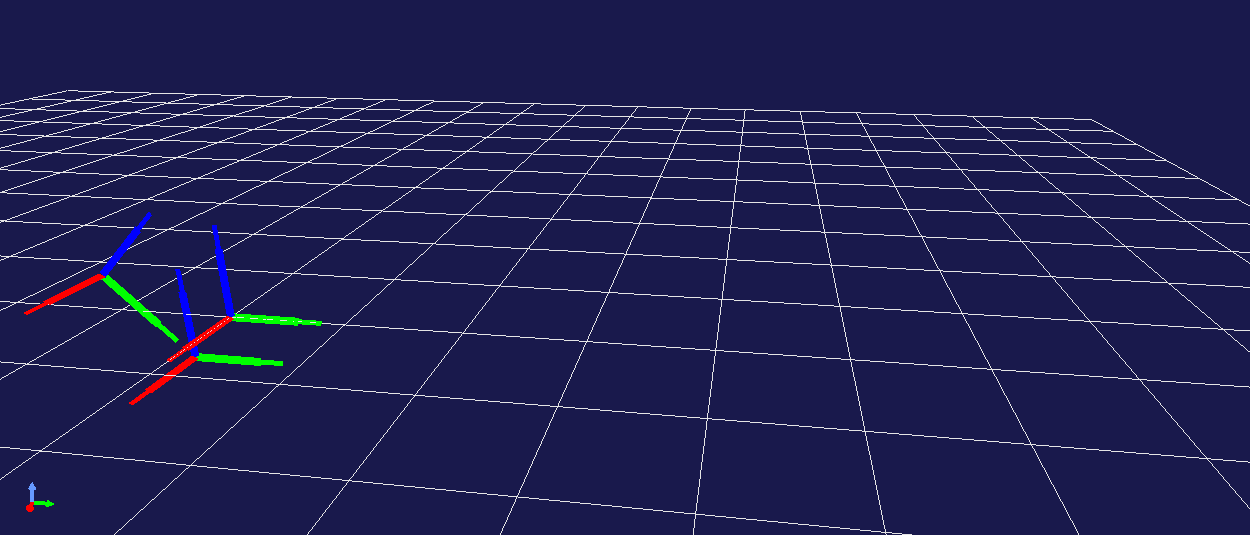

In [40]:
%display